In [2]:
# Import necessary libraries
import pandas as pd

# Load the dataset
Dataset_CRM_TypeA = pd.read_csv("Dataset_CRM_typeA.csv")

# Display the structure of the dataset
print(Dataset_CRM_TypeA.info())

# Display the first few rows to check the data
Dataset_CRM_TypeA.head(10)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1093471 entries, 0 to 1093470
Data columns (total 13 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   Item_id         1093471 non-null  float64
 1   price per unit  935125 non-null   float64
 2   price per kg    158346 non-null   float64
 3   DATE            1093471 non-null  int64  
 4   Customer_id     1093471 non-null  object 
 5   BRAND_POSITION  1091936 non-null  object 
 6   SECTOR          1093471 non-null  object 
 7   FAMILY          1093471 non-null  object 
 8   CATEGORY        1093471 non-null  object 
 9   BRAND           987005 non-null   object 
 10  SUB-BRAND       901114 non-null   object 
 11  UNITS           1093471 non-null  float64
 12  KG              1093471 non-null  float64
dtypes: float64(5), int64(1), object(7)
memory usage: 108.5+ MB
None


,Item_id,price per unit,price per kg,DATE,Customer_id,BRAND_POSITION,SECTOR,FAMILY,CATEGORY,BRAND,SUB-BRAND,UNITS,KG
0,372061000.0,1.517745,NaN,20220114,C3343F7F539231C50BE0B8BD5AD3C827,LEADER,FRESH,SURGELATI,SURGELATI VEGETALI,OROGEL,OROGEL,1.0,0.00
1,651535900.0,5.467088,NaN,20220114,C3343F7F539231C50BE0B8BD5AD3C827,OTHERS,FRESH,GASTRONOMIA (reparto class mktg),FORMAGGI STAGIONATI TAKE AWAY,SASSANO,SASSANO,2.0,0.00
2,701070700.0,0.254918,NaN,20220114,C3343F7F539231C50BE0B8BD5AD3C827,OTHERS,GROCERY,ALIMENTARI,SNACK SALATI,LAY'S,LAY'S,1.0,0.00
3,712684500.0,NaN,12.009883,20220114,C3343F7F539231C50BE0B8BD5AD3C827,OTHERS,FRESH,GASTRONOMIA (reparto class mktg),GASTRONOMIA TAKE AWAY,GUSTO QUI,GUSTO QUI,0.0,0.44
4,669647100.0,1.877431,NaN,20220114,C3343F7F539231C50BE0B8BD5AD3C827,PRIVATE LABEL,FRESH,LIBERO SERVIZIO,FORMAGGI STAGIONATI,COOP,COOP,2.0,0.00
5,465351100.0,2.347298,NaN,20220114,C3343F7F539231C50BE0B8BD5AD3C827,OTHERS,SUPERFRESH,ORTOFRUTTA,AGRUMI,SENZA MARCA,SENZA MARCA,1.0,0.00
6,701070600.0,1.715466,NaN,20220114,C3343F7F539231C50BE0B8BD5AD3C827,PREMIUM PRICE,GROCERY,ALIMENTARI,SNACK SALATI,LAY'S,LAY'S,1.0,0.00
7,688101200.0,2.365273,NaN,20220114,C3343F7F539231C50BE0B8BD5AD3C827,OTHERS,FRESH,SURGELATI,SURGELATI VEGETALI,BONDUELLE,NATURA IN PADELLA,1.0,0.00
8,646284700.0,1.177764,NaN,20220114,C3343F7F539231C50BE0B8BD5AD3C827,PRIVATE LABEL,GROCERY,SALSE/COND./SCATOLAM,CONSERVE POMODORO,COOP,COOP,1.0,0.00
9,299894100.0,1.457639,NaN,20220114,C3343F7F539231C50BE0B8BD5AD3C827,OTHERS,SEASONAL AND BRICOLAGE,FAI DA TE,MANUTENZIONE,SENZA MARCA,NaN,1.0,0.00


In [3]:
import re

# Standardize column names
Dataset_CRM_TypeA.columns = (
    Dataset_CRM_TypeA.columns
    .str.replace("-", "_")  # Replace dashes with underscores
    .str.replace(" ", "_")  # Replace spaces with underscores
    .str.replace(r"([a-z])([A-Z])", r"\1_\2", regex=True)  # Add underscore between lowercase and uppercase transitions
    .str.lower()  # Convert all to lowercase
    .str.title()  # Capitalize the first letter of each word
)


In [4]:
# Reorder columns: move "Units" and "Kg" after "Price_Per_Kg"
column_order = ["Item_Id", "Price_Per_Unit", "Price_Per_Kg", "Units", "Kg"] + [
    col for col in Dataset_CRM_TypeA.columns if col not in ["Item_Id", "Price_Per_Unit", "Price_Per_Kg", "Units", "Kg"]
]

Dataset_CRM_TypeA = Dataset_CRM_TypeA[column_order]

# Display updated column names
print(Dataset_CRM_TypeA.columns)

Index(['Item_Id', 'Price_Per_Unit', 'Price_Per_Kg', 'Units', 'Kg', 'Date',
       'Customer_Id', 'Brand_Position', 'Sector', 'Family', 'Category',
       'Brand', 'Sub_Brand'],
      dtype='object')


In [5]:
#### 2.1 Handle Missing Values ####
import numpy as np
# Replace "NULL" with NaN for standard missing value representation
Dataset_CRM_TypeA.replace("NULL", np.nan, inplace=True)

#### 2.2 Detect and Remove Duplicate Rows ####
# Check and report duplicates
num_duplicates = Dataset_CRM_TypeA.duplicated().sum()
print(f"Number of duplicate rows: {num_duplicates}")


Number of duplicate rows: 0


In [6]:
# Remove duplicates if found
if num_duplicates > 0:
    Dataset_CRM_TypeA = Dataset_CRM_TypeA.drop_duplicates()
    print("Duplicate rows removed.")
else:
    print("No duplicate rows found.")

No duplicate rows found.


In [7]:
#### 2.3 Validate and Correct Column Formats ####
# Ensure the 'Date' column is in datetime format
Dataset_CRM_TypeA["Date"] = pd.to_datetime(Dataset_CRM_TypeA["Date"], format="%Y%m%d", errors="coerce")

# Convert necessary columns to numeric (if not already)
numeric_columns = ["Price_Per_Unit", "Price_Per_Kg", "Units", "Kg"]
Dataset_CRM_TypeA[numeric_columns] = Dataset_CRM_TypeA[numeric_columns].apply(pd.to_numeric, errors="coerce")

In [8]:
import numpy as np

# Enhanced detailed summary of the dataset columns
def analyze_column(col):
    if col.dtype == "O":  # Object type (categorical/text)
        return {
            "Type": "Object",
            "Min": None,
            "Max": None,
            "Unique_Values": col.nunique(),
            "Missing_Values": col.isna().sum(),
            "Missing_Percentage": round(col.isna().mean() * 100, 2),
            "Zero_Count": None,
            "Zero_Percentage": None,
            "Value_Sign": None
        }
    elif np.issubdtype(col.dtype, np.number):  # Numeric type
        min_val = col.min(skipna=True)
        max_val = col.max(skipna=True)
        return {
            "Type": "Numeric",
            "Min": round(min_val, 3) if not np.isnan(min_val) else None,
            "Max": round(max_val, 3) if not np.isnan(max_val) else None,
            "Unique_Values": col.nunique(),
            "Missing_Values": col.isna().sum(),
            "Missing_Percentage": round(col.isna().mean() * 100, 2),
            "Zero_Count": (col == 0).sum(),
            "Zero_Percentage": round((col == 0).mean() * 100, 2),
            "Value_Sign": (
                "Positive" if (col >= 0).all() 
                else "Negative" if (col < 0).all() 
                else "Mixed"
            )
        }
    elif np.issubdtype(col.dtype, np.datetime64):  # Date type
        return {
            "Type": "Date",
            "Min": str(col.min(skipna=True).date()),
            "Max": str(col.max(skipna=True).date()),
            "Unique_Values": col.nunique(),
            "Missing_Values": col.isna().sum(),
            "Missing_Percentage": round(col.isna().mean() * 100, 2),
            "Zero_Count": None,
            "Zero_Percentage": None,
            "Value_Sign": None
        }
    else:
        return {
            "Type": str(col.dtype),
            "Min": None,
            "Max": None,
            "Unique_Values": col.nunique(),
            "Missing_Values": col.isna().sum(),
            "Missing_Percentage": round(col.isna().mean() * 100, 2),
            "Zero_Count": None,
            "Zero_Percentage": None,
            "Value_Sign": None
        }

# Apply function to each column
summary_data = {col: analyze_column(Dataset_CRM_TypeA[col]) for col in Dataset_CRM_TypeA.columns}

# Convert summary data into a DataFrame
enhanced_summary_table = pd.DataFrame.from_dict(summary_data, orient="index")

# Display the enhanced summary table
print(enhanced_summary_table)


                   Type         Min             Max  Unique_Values  \
Item_Id         Numeric   1673500.0  850765000010.0          30453   
Price_Per_Unit  Numeric         0.0         983.769          29273   
Price_Per_Kg    Numeric       0.118          96.476           1180   
Units           Numeric         0.0           537.0             70   
Kg              Numeric         0.0         15016.0           3197   
Date               Date  2022-01-02      2022-01-31             30   
Customer_Id      Object        None            None          21246   
Brand_Position   Object        None            None              7   
Sector           Object        None            None             12   
Family           Object        None            None             56   
Category         Object        None            None            423   
Brand            Object        None            None           2559   
Sub_Brand        Object        None            None           3225   

                Mis

In [9]:
# Count missing values in Brand_Position, Brand, and Sub_Brand
missing_summary = pd.DataFrame({
    "Column": ["Brand_Position", "Brand", "Sub_Brand"],
    "Missing_Values": [
        Dataset_CRM_TypeA["Brand_Position"].isna().sum(),
        Dataset_CRM_TypeA["Brand"].isna().sum(),
        Dataset_CRM_TypeA["Sub_Brand"].isna().sum()
    ]
})

# Display summary
print(missing_summary)

           Column  Missing_Values
0  Brand_Position            1535
1           Brand          106466
2       Sub_Brand          192357


In [10]:
# Create Transaction_Value column
Dataset_CRM_TypeA["Transaction_Value"] = Dataset_CRM_TypeA.apply(
    lambda row: row["Price_Per_Kg"] * row["Kg"] if pd.notna(row["Price_Per_Kg"]) and row["Kg"] > 0 
    else (row["Price_Per_Unit"] * row["Units"] if pd.notna(row["Price_Per_Unit"]) and row["Units"] > 0 else None),
    axis=1
)

In [11]:
# Reorder columns to place Transaction_Value after Kg
cols = list(Dataset_CRM_TypeA.columns)
cols.insert(cols.index("Kg") + 1, cols.pop(cols.index("Transaction_Value")))
Dataset_CRM_TypeA = Dataset_CRM_TypeA[cols]


In [12]:
# Filter rows where Transaction_Value is NA
transaction_value_missing = Dataset_CRM_TypeA[Dataset_CRM_TypeA["Transaction_Value"].isna()]

# Filter rows where both Units and Kg are equal to 0
units_kg_zero = Dataset_CRM_TypeA[(Dataset_CRM_TypeA["Units"] == 0) & (Dataset_CRM_TypeA["Kg"] == 0)]

# Count rows before removal
initial_row_count = len(Dataset_CRM_TypeA)

In [13]:
# Remove rows with Transaction_Value as NA
Dataset_CRM_TypeA = Dataset_CRM_TypeA.dropna(subset=["Transaction_Value"])

# Count rows after removal
final_row_count = len(Dataset_CRM_TypeA)

# Calculate removed rows
rows_removed = initial_row_count - final_row_count

# Display the result
print(f"Initial row count: {initial_row_count}")
print(f"Final row count: {final_row_count}")
print(f"Number of rows removed: {rows_removed}")

Initial row count: 1093471
Final row count: 1093461
Number of rows removed: 10


In [14]:
# Disable scientific notation for better readability
pd.set_option("display.float_format", "{:.3f}".format)

# Function to detect whether numeric values are positive, negative, or mixed
def detect_value_sign(series):
    if pd.api.types.is_numeric_dtype(series):
        if (series >= 0).all():
            return "Positive"
        elif (series < 0).all():
            return "Negative"
        else:
            return "Mixed"
    return None

# Enhanced summary table for the dataset
enhanced_summary_table = pd.DataFrame({
    "Column": Dataset_CRM_TypeA.columns,  # Column names
    "Type": [Dataset_CRM_TypeA[col].dtype for col in Dataset_CRM_TypeA.columns],  # Data types
    "Min": [Dataset_CRM_TypeA[col].min(skipna=True) if pd.api.types.is_numeric_dtype(Dataset_CRM_TypeA[col]) else None for col in Dataset_CRM_TypeA.columns],  # Min value
    "Max": [Dataset_CRM_TypeA[col].max(skipna=True) if pd.api.types.is_numeric_dtype(Dataset_CRM_TypeA[col]) else None for col in Dataset_CRM_TypeA.columns],  # Max value
    "Unique_Values": [Dataset_CRM_TypeA[col].nunique() for col in Dataset_CRM_TypeA.columns],  # Unique value count
    "Missing_Values": [Dataset_CRM_TypeA[col].isna().sum() for col in Dataset_CRM_TypeA.columns],  # Missing value count
    "Missing_Percentage": [(Dataset_CRM_TypeA[col].isna().mean() * 100).round(2) for col in Dataset_CRM_TypeA.columns],  # Missing percentage
    "Zero_Count": [Dataset_CRM_TypeA[col][Dataset_CRM_TypeA[col] == 0].count() if pd.api.types.is_numeric_dtype(Dataset_CRM_TypeA[col]) else None for col in Dataset_CRM_TypeA.columns],  # Zero count
    "Zero_Percentage": [(Dataset_CRM_TypeA[col][Dataset_CRM_TypeA[col] == 0].count() / len(Dataset_CRM_TypeA) * 100).round(2) if pd.api.types.is_numeric_dtype(Dataset_CRM_TypeA[col]) else None for col in Dataset_CRM_TypeA.columns],  # Zero percentage
    "Value_Sign": [detect_value_sign(Dataset_CRM_TypeA[col]) for col in Dataset_CRM_TypeA.columns]  # Sign of values
})

# Display the enhanced summary table
print(enhanced_summary_table)


               Column            Type         Min              Max  \
0             Item_Id         float64 1673500.000 850765000010.000   
1      Price_Per_Unit         float64       0.000          983.769   
2        Price_Per_Kg         float64       0.118           96.476   
3               Units         float64       0.000          537.000   
4                  Kg         float64       0.000        15016.000   
5   Transaction_Value         float64       0.000         8765.284   
6                Date  datetime64[ns]         NaN              NaN   
7         Customer_Id          object         NaN              NaN   
8      Brand_Position          object         NaN              NaN   
9              Sector          object         NaN              NaN   
10             Family          object         NaN              NaN   
11           Category          object         NaN              NaN   
12              Brand          object         NaN              NaN   
13          Sub_Bran

In [15]:
# Display column names
print(Dataset_CRM_TypeA.columns)

# Display the structure of the dataset
print(Dataset_CRM_TypeA.info())

# Generate a statistical summary of the dataset
print(Dataset_CRM_TypeA.describe())

Index(['Item_Id', 'Price_Per_Unit', 'Price_Per_Kg', 'Units', 'Kg',
       'Transaction_Value', 'Date', 'Customer_Id', 'Brand_Position', 'Sector',
       'Family', 'Category', 'Brand', 'Sub_Brand'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1093461 entries, 0 to 1093470
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype         
---  ------             --------------    -----         
 0   Item_Id            1093461 non-null  float64       
 1   Price_Per_Unit     935115 non-null   float64       
 2   Price_Per_Kg       158346 non-null   float64       
 3   Units              1093461 non-null  float64       
 4   Kg                 1093461 non-null  float64       
 5   Transaction_Value  1093461 non-null  float64       
 6   Date               1093461 non-null  datetime64[ns]
 7   Customer_Id        1093461 non-null  object        
 8   Brand_Position     1091926 non-null  object        
 9   Sector             1093461 non-null

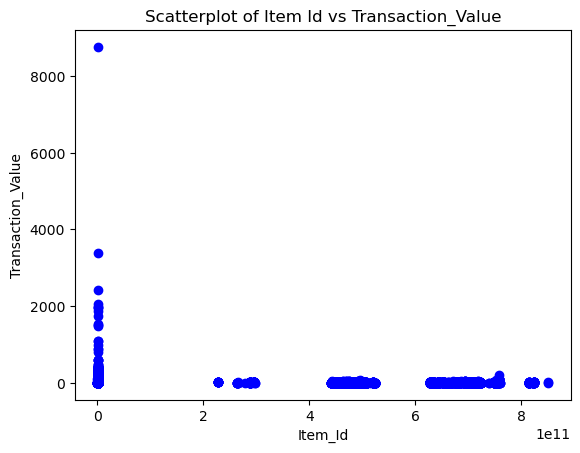

In [16]:
import matplotlib.pyplot as plt

# Create a scatter plot for Item_Id vs Transaction_Value
plt.scatter(
    x = Dataset_CRM_TypeA['Item_Id'],  # X-axis: Item_Id
    y = Dataset_CRM_TypeA['Transaction_Value'],  # Y-axis: Transaction_Value
    color = 'blue',  # Color of the points
    marker = 'o'  # Point type (filled circles)
)

# Title of the plot
plt.title("Scatterplot of Item Id vs Transaction_Value")

# Label for the X-axis
plt.xlabel("Item_Id")

# Label for the Y-axis
plt.ylabel("Transaction_Value")

# Display the plot
plt.show()


In [19]:
# Save the cleaned dataset to a CSV file
Dataset_CRM_TypeA.to_csv("Dataset_CRM_TypeA_Cleaned.csv", index=False, na_rep="NA")

# Confirm the dataset has been saved
print("The cleaned dataset has been saved as 'Dataset_CRM_TypeA_Cleaned.csv'.")

The cleaned dataset has been saved as 'Dataset_CRM_TypeA_Cleaned.csv'.


In [18]:
import os
print(os.getcwd())


g:\datascience\Projects\Marketing Analytics project in Python
